In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
img = cv2.imread('imgs/121.jpg', 1)
#img = cv2.medianBlur(img, 5)
kernel = np.ones((5,5),np.uint8)
#img = cv2.erode(img, kernel, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

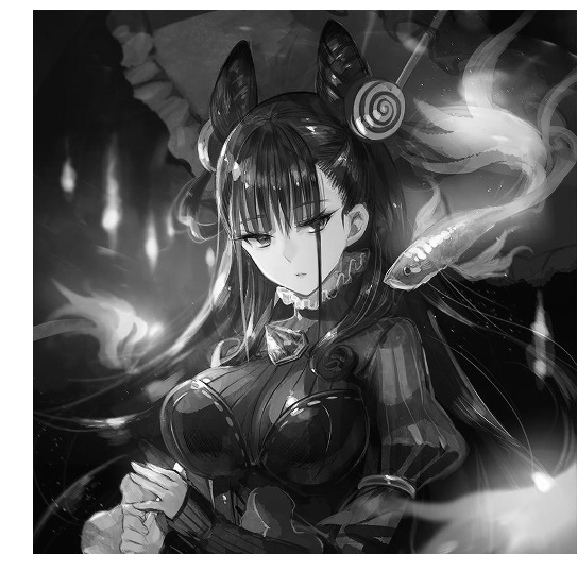

In [3]:
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

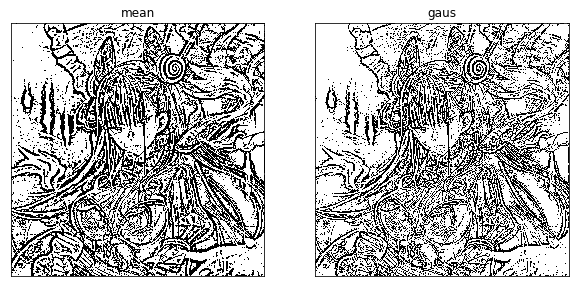

In [4]:
# Adaptive?
th_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,9,2)
th_gaus = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,9,2)

images = [th_mean, th_gaus]
titles = ['mean', 'gaus']

for i in range(2):
    plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

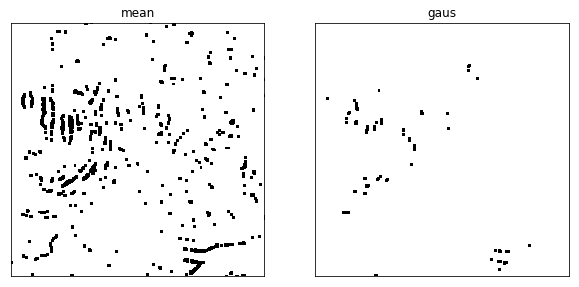

In [5]:
kernel = np.ones((5,5),np.uint8)

close_mean = cv2.morphologyEx(th_mean, cv2.MORPH_CLOSE, kernel)
close_gaus = cv2.morphologyEx(th_gaus, cv2.MORPH_CLOSE, kernel)

kernel = np.ones((2,2),np.uint8)
erode_close_mean = cv2.erode(close_mean, kernel, 2)
erode_close_gaus = cv2.erode(close_gaus, kernel, 2)

images = [erode_close_mean, erode_close_gaus]
titles = ['mean', 'gaus']

for i in range(2):
    plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

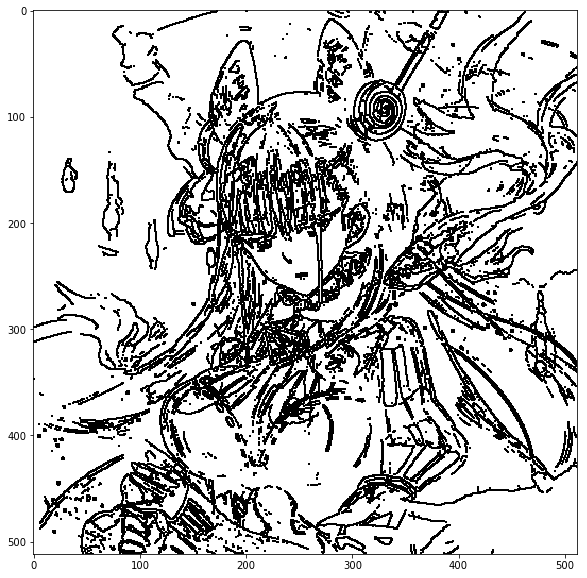

In [6]:
# Canny?
edges = cv2.bitwise_not(cv2.Canny(img,100,100))

kernel = np.ones((2,2),np.uint8)
edges_erode = cv2.erode(edges, kernel, 2)
#blur = cv2.GaussianBlur(edges_erode,(3,3),0)

plt.imshow(edges_erode, cmap='gray')
plt.show()

In [7]:
edges_erode.shape

(512, 512)

In [8]:
np.expand_dims(edges_erode, 2).shape

(512, 512, 1)